# QST Testing

In [2]:
from src.cs_qst import CSQST
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from itertools import product
from functools import reduce
import matplotlib.cm as cm
import scipy

In [3]:
L = 3
psi = np.zeros(2**L)
psi[0] = 1/np.sqrt(2)
psi[-1] = 1/np.sqrt(2)

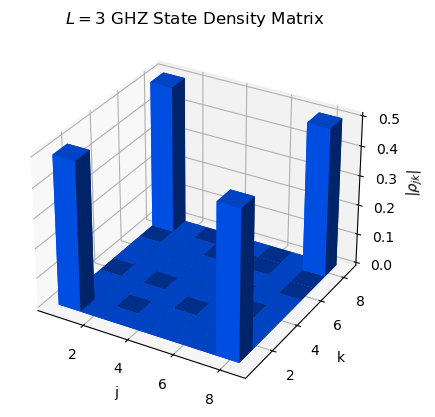

In [5]:
cs = CSQST(L, psi)
cs.show_target("$L=3$ GHZ State Density Matrix")

In [6]:
cs.run(100, 15, epsilon=0.4)
# cs.show_output("L=3 GHZ State")

In [5]:
f, s = cs.run_avg(10, 100, 15, epsilon=0.4)

Running with m=15, eps=0.4000 ...
No reconstruction available


Sweep over epsilon and m:

In [6]:
epsilons = np.arange(0.05, 2.05, 0.05)
ms = np.arange(4, 20, 1)

In [7]:
f_avgs = np.zeros((len(epsilons), len(ms)))
f_stds = np.zeros((len(epsilons), len(ms)))

for i, eps in enumerate(epsilons):
    for j, m in enumerate(ms):
        f_avgs[i, j], f_stds[i, j] = cs.run_avg(10, 100, m, epsilon=eps)

Running with m=4, eps=0.0500 ...
Running with m=5, eps=0.0500 ...
Running with m=6, eps=0.0500 ...
Running with m=7, eps=0.0500 ...
Running with m=8, eps=0.0500 ...
Running with m=9, eps=0.0500 ...
Running with m=10, eps=0.0500 ...
Running with m=11, eps=0.0500 ...
Running with m=12, eps=0.0500 ...
Running with m=13, eps=0.0500 ...
Running with m=14, eps=0.0500 ...
Running with m=15, eps=0.0500 ...
Running with m=16, eps=0.0500 ...
No reconstruction available
Running with m=17, eps=0.0500 ...
No reconstruction available
No reconstruction available
No reconstruction available
Running with m=18, eps=0.0500 ...
No reconstruction available
No reconstruction available
No reconstruction available
Running with m=19, eps=0.0500 ...
No reconstruction available
No reconstruction available
No reconstruction available
No reconstruction available
No reconstruction available
No reconstruction available
Running with m=4, eps=0.1000 ...
Running with m=5, eps=0.1000 ...
Running with m=6, eps=0.1000 ...

In [8]:
np.savetxt("f_avgs m=4-19 e=.05-2.0.csv", f_avgs, delimiter=',')
np.savetxt("f_stds m=4-19 e=.05-2.0.csv", f_stds, delimiter=',')

[Text(0, 0, '18'),
 Text(0, 2, '16'),
 Text(0, 4, '14'),
 Text(0, 6, '12'),
 Text(0, 8, '10'),
 Text(0, 10, '8'),
 Text(0, 12, '6'),
 Text(0, 14, '4')]

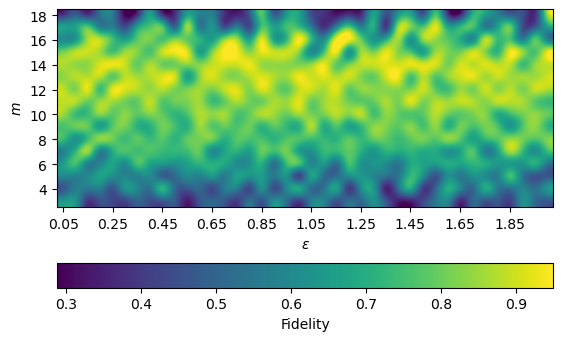

In [54]:
from matplotlib.ticker import StrMethodFormatter

fig, ax = plt.subplots()
im = ax.imshow(f_avgs[:, ::-1].T, interpolation="spline36")
# ax.imshow(f_avgs.T, interpolation="spline36")
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel(r"$m$")
cbar = ax.figure.colorbar(im, ax=ax, orientation="horizontal")
cbar.set_label("Fidelity")



ax.set_xticks(np.arange(0, len(epsilons), 4))
ax.set_xticklabels([ f"{x:.2f}" for x in epsilons[::4]])
ax.set_yticks(np.arange(0, len(ms), 2))
ax.set_yticklabels([ f"{x}" for x in ms[::2]][::-1])
